In [1]:
%matplotlib inline

# Building NLP Tools for SEO

##### Nikhil Almeida
##### Sr. Manager, Data Science
##### Consumer Track

# Agenda
* SEO
* NLP using TextBlob
    * Parts-of-Speech Tagging
    * Sentiment Analysis
    * Word Inflection
    * Lemmatization
    * Spell Check
    * Language Detection and Translation
* Word Distances
* Word Vectorization
    * Count Vectorizers
    * TF-IDF
    * Word2Vec
    * Paragraph2Vec
* Vector Visualization    


### What is SEO?
SEO stands for “search engine optimization.” It is the process of getting traffic from the “free,” “organic,” “editorial” or “natural” search results on search engines.


### SEO Success Factors

|On Page|Off Page   |
|---|---|
|Quality   |Authority   |
|Content Research|Engage   |
|Words   |Link Quality   |
|Fresh|Link Text|
|Answers|Social Reputation|
|Thin|Number of Ads|
|Relevant Titles|Site History|



<img src="./img/2017-SEO_Periodic_Table.png" />
https://searchengineland.com/seotable

## SEO Metrics

* **Keywords**
* **Search Volume**
* **Keyword Potential** 
* **Keyword opportunity**
* **SERP Ranks**
* **Topic Authority**

## SEO Data Sources
* **[Google Adwords](https://google.com/adwords)**
* **[SEMRUSH](https://semrush.com)**
* **[MOZ Keywords Planner](https://moz.com)**
* **[Keyword Tool](https://keywordtool.io)**
* **[Google Search Console](https://www.google.com/webmasters)**
* **[Deep Crawl](https://www.deepcrawl.com/)**
* **[AHRefs](https://www.ahrefs.com/)**
* **[Answer The Public](https://answerthepublic.com/)**

# Tools Built
* Related Content Module
* Content De-Duplication
* Question Detection
* Title / Brief Creation
* Topic Authority
* Topic Detection
* Keyword Classification into Topics
* Keyword Potential
* Text Summarization

# Text Blob

TextBlob aims to provide access to common text-processing operations through a familiar interface. You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.


In [2]:
from textblob import TextBlob
blob = TextBlob("A mad boxer sent a quick, gloved jab to the jaw of his dizzy opponent. The quick brown fox jumps over the lazy dog. The five boxing wizards jump quickly.")
blob.sentences


[Sentence("A mad boxer sent a quick, gloved jab to the jaw of his dizzy opponent."),
 Sentence("The quick brown fox jumps over the lazy dog."),
 Sentence("The five boxing wizards jump quickly.")]

In [95]:
blob.sentences[0].words

WordList(['A', 'mad', 'boxer', 'sent', 'a', 'quick', 'gloved', 'jab', 'to', 'the', 'jaw', 'of', 'his', 'dizzy', 'opponent'])

### Part-of-Speech Tagging

In [105]:
pos_mapper = {"CC": "Coordinating conjunction",
"CD": "Cardinal number",
"DT": "Determiner",
"EX": "Existential there",
"FW": "Foreign word",
"IN": "Preposition or subordinating conjunction",
"JJ": "Adjective",
"JJR": "Adjective, comparative",
"JJS": "Adjective, superlative",
"LS": "List item marker",
"MD": "Modal",
"NN": "Noun, singular or mass",
"NNS": "Noun, plural",
"NNP": "Proper noun, singular",
"NNPS": "Proper noun, plural",
"PDT": "Predeterminer",
"POS": "Possessive ending",
"PRP": "Personal pronoun",
"PRP$": "Possessive pronoun",
"RB": "Adverb",
"RBR": "Adverb, comparative",
"RBS": "Adverb, superlative",
"RP": "Particle",
"SYM": "Symbol",
"TO": "to",
"UH": "Interjection",
"VB": "Verb, base form",
"VBD": "Verb, past tense",
"VBG": "Verb, gerund or present participle",
"VBN": "Verb, past participle",
"VBP": "Verb, non-3rd person singular present",
"VBZ": "Verb, 3rd person singular present",
"WDT": "Wh-determiner",
"WP": "Wh-pronoun",
"WP$": "Possessive wh-pronoun",
"WRB": "Wh-adverb"}


## References
* https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
* http://language.worldofcomputing.net/pos-tagging/parts-of-speech-tagging.html

In [106]:
sentence = blob.sentences[1]
print(sentence, "\n\n", "Tags: ", sentence.tags, '\n')
for tag in sentence.tags:
    print("{}---{}---{}".format(tag[0], tag[1], pos_mapper[tag[1]]))



The quick brown fox jumps over the lazy dog. 

 Tags:  [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')] 

The---DT---Determiner
quick---JJ---Adjective
brown---NN---Noun, singular or mass
fox---NN---Noun, singular or mass
jumps---VBZ---Verb, 3rd person singular present
over---IN---Preposition or subordinating conjunction
the---DT---Determiner
lazy---JJ---Adjective
dog---NN---Noun, singular or mass


### Noun Phrases
A noun phrase includes a noun—a person, place, or thing—and the modifiers which distinguish it.


In [392]:
print(blob.sentences[0])
blob.sentences[0].noun_phrases

A mad boxer sent a quick, gloved jab to the jaw of his dizzy opponent.


WordList(['mad boxer', 'dizzy opponent'])

### Applications of POS Tagging
* Word Sense Disambiguation (Easy Search Improvements)
* Named Entity Resolution
* Sentiment Analysis
* Question Answering

####  Word Sense Disambiguation (Easy Search Improvements)

In [228]:
title = 'How to fish a fish?'
" ".join(["{}_{}".format(word, tag) for word, tag in TextBlob(title).tags])


'How_WRB to_TO fish_VB a_DT fish_NN'

#### Question Detection

In [4]:
import spacy
import json
from nltk import Tree
import os
nlp = spacy.load('en')
from IPython.display import display, Markdown, Latex


In [5]:
# Tree Visualizer
def tok_format(tok):
    return "_".join([tok.orth_, tok.tag_, str(tok.dep_)])


def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(tok_format(node), [to_nltk_tree(child) for child in node.children])
    else:
        return tok_format(node)

def print_tree(sent):
    doc = nlp(sent)
    print(sent)
    [to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]  

In [6]:
print_tree("How was the moon formed?")


How was the moon formed?
               formed_VBN_ROOT                           
       _______________|_________________________          
      |               |            |     moon_NN_nsubjpas
      |               |            |            s        
      |               |            |            |         
How_WRB_advmod was_VBD_auxpass ?_._punct    the_DT_det   



In [117]:
print_tree("Is California the best state in the union?")

Is California the best state in the union?
                     Is_VBZ_ROOT                               
     _____________________|_____________                        
    |                            California_NNP_n              
    |                                  subj                    
    |                                   |                       
    |                             state_NN_appos               
    |          _________________________|_______________        
    |         |                         |           in_IN_prep 
    |         |                         |               |       
    |         |                         |         union_NN_pobj
    |         |                         |               |       
?_._punct the_DT_det              best_JJS_amod     the_DT_det 



<img src="./img/spacy dependency visualizer.png" />

In [123]:
def is_question(_sentence):
    sentence = list(nlp(_sentence).sents)[0]
    if len(sentence) > 15:
        return False
    root = sentence.root
    _is_question = False
    ROOT_QUESTION_VERBS = ['VBD','VBG','VBN', 'VBP','VBZ', 'MD', 'TO']
    VERBS = [ 'VBD','VBG','VBN', 'VBP', 'VBZ','MD', 'TO', 'VB']
    WH_QUESTIONS = ['WP', 'WP$', 'WRB', 'WDT']

    if root.n_lefts == 0: 
        return root.tag_ in set(ROOT_QUESTION_VERBS  + VERBS)

    for child in root.lefts:
        if child.tag_ in WH_QUESTIONS:
            continue
        if child.tag_ in VERBS:
            if child.dep_ == 'aux':
                return True
        return False
    return True


In [126]:
is_question("Is California the best state in the union")

True

In [127]:
is_question("Did the brown fox jump over the lazy dog.")

True

In [128]:
is_question("Will Anthony go to Tokyo")

True

### Sentiment Analysis

In [133]:
print(TextBlob("I think california is great").sentiment)

Sentiment(polarity=0.8, subjectivity=0.75)


In [135]:
print(TextBlob("california is not great").sentiment)

Sentiment(polarity=-0.4, subjectivity=0.75)


In [143]:
print(TextBlob("california's has a population of 39.4M people").sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


### Word Inflection

In [174]:
sentence = TextBlob('Use 4 spaces per indentation level.')
sentence

TextBlob("Use 4 spaces per indentation level.")

In [175]:
sentence.words[2].singularize()

'space'

In [176]:
sentence.words[-1].pluralize()

'levels'

### Lemmatization

In [177]:
from textblob import Word
w = Word("octopi")
w.lemmatize()

'octopus'

In [178]:
w = Word("went")
w.lemmatize("v")  # Pass in WordNet part of speech (verb)

'go'

### Spell Check

In [193]:
from textblob import Word
w = Word('countr')
w.spellcheck()

[('count', 0.620746887966805),
 ('country', 0.3510373443983402),
 ('county', 0.014107883817427386),
 ('counter', 0.012448132780082987),
 ('counts', 0.0016597510373443983)]

In [195]:
w = Word('fallibility')
w.spellcheck()

[('fallibility', 1.0)]

In [196]:
b = TextBlob("I havv goood speling!")
b.correct()

TextBlob("I have good spelling!")

### Language Translation

In [197]:
en_blob = TextBlob(u'Simple is better than complex.')
en_blob.translate(to='es')

TextBlob("Simple es mejor que complejo.")

### Language Detection

In [200]:
b = TextBlob(u"بسيط هو أفضل من مجمع")
b.detect_language()

'ar'

## Word Distances

##### References
* [Levenshtein Distance and Library Reference](https://rawgit.com/ztane/python-Levenshtein/master/docs/Levenshtein.html)
* [JARO Distance](https://rosettacode.org/wiki/Jaro_distance)

####  Levenshtein Distance
The distance is the number of deletions, insertions, or substitutions required to transform string A into string B.

In [179]:
import Levenshtein

In [149]:
A = "SoCal Python"
B = "So Cal Python"
Levenshtein.distance(A, B)

1

#### Hamming Distance
The Hamming distance is simply the number of differing characters. That means the length of the strings must be the same.

In [152]:
A = "Southern California Python"
B = "Northern California Python"
Levenshtein.hamming(A, B)

2

#### Jaro
The Jaro algorithm is a measure of characters in common, being no more than half the length of the longer string in distance, with consideration for transpositions. The Jaro string similarity metric is intended for short strings like personal last names. It is 0 for completely different strings and 1 for identical strings.

#### Jaro-Winkler
The Jaro-Winkler string similarity metric is a modification of Jaro metric giving more weight to common prefix, as spelling mistakes are more likely to occur near ends of words.

The prefix weight is inverse value of common prefix length sufficient to consider the strings *identical*. If no prefix weight is specified, 1/10 is used.

### Jaro-Winkler

In [169]:
A = "California"
B = "Californification"

print("JARO\t\t: ",Levenshtein.jaro(A, B))
print("JARO-Winkler\t: ",Levenshtein.jaro_winkler(A, B))

JARO		:  0.8627450980392157
JARO-Winkler	:  0.9862745098039216


#### Median
Find an approximate generalized median string using greedy algorithm.

In [170]:
fixme = ['Levnhtein', 'Leveshein', 'Leenshten', 'Leveshtei', 'Lenshtein', 'Lvenstein', 'Levenhtin', 'evenshtei']
Levenshtein.median(fixme)

'Levenshtein'

# Word and Document Vectors


In [13]:
import numpy as np
import pandas as pd
import json

def get_data_df(filename):
    with open(filename) as read_file:
        df =  pd.DataFrame([json.loads(line) for line in read_file])
        df['text'] = df['title'] + df['text']
    return df

### Count Vectorizer


http://andrewgaidus.com/Finding_Related_Wikipedia_Articles/

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
articles_df = get_data_df('./finance_articles.json')

In [15]:
count_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,3), min_df=5, max_df=0.5, stop_words = 'english')
count_matrix = count_vectorizer.fit_transform(articles_df.text.tolist())
features = count_vectorizer.get_feature_names()

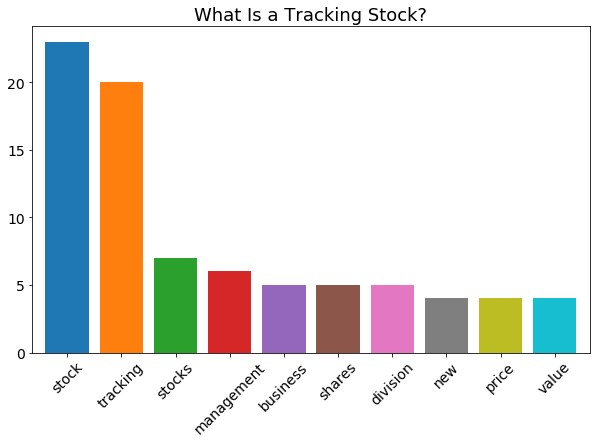

In [16]:
row_number = 1
d = pd.Series(count_matrix[row_number].toarray().flatten(),  index=features).sort_values(ascending=False)
ax = d[:10].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=45, title=articles_df.loc[row_number].title)
ax.title.set_size(18)

## TF-IDF (Term Frequency - Inverse Document Frequency)

> importance = appearances(term, document) / count(documents containing term in collection)


#### Term Frequency
```
tf = count(word, document) / len(document)
```

#### Term Frequency
```
idf = log( len(collection) / count(document_containing_term, collection) )
```
#### TF-IDF
```
tf-idf = tf * idf
```

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df=5, max_df=0.5)
tfidf_matrix = tfidf_vectorizer.fit_transform(articles_df.text.tolist())
features = tfidf_vectorizer.get_feature_names()

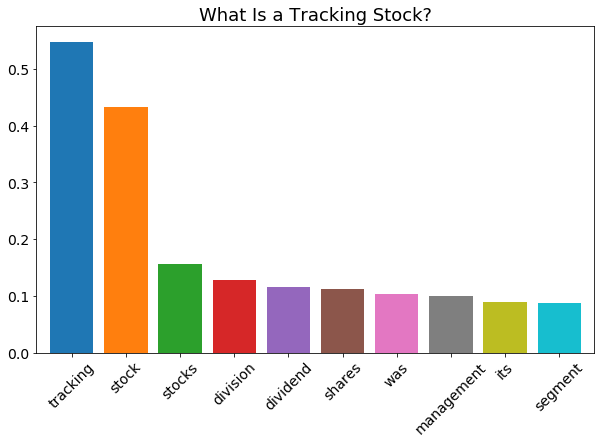

In [18]:
row_number = 1
d = pd.Series(tfidf_matrix[row_number].toarray().flatten(),  index=features).sort_values(ascending=False)
ax = d[:10].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=45, title=articles_df.loc[row_number].title)
ax.title.set_size(18)

### Applications of TF-IDF -- Document Similarity

In [20]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=10).fit(tfidf_matrix)

def get_closest_neighs(row_number):
    distances, indices = nbrs.kneighbors(tfidf_matrix.getrow(row_number))
    names_similar = pd.Series(indices.flatten()).map(articles_df.reset_index()['title'])
    result = pd.DataFrame({'distance':distances.flatten(), 'title':names_similar})
    return result

In [21]:
print(articles_df.loc[2].title)
get_closest_neighs(2)

Avoid These Errors When Starting to Sell on eBay


,distance,title
0,0.000000,Avoid These Errors When Starting to Sell on eBay
1,1.086543,30 Ways to Use Product Sourcing for eBay Selling
2,1.135407,Swedish Fish Flavored Oreos Selling on eBay fo...
3,1.230878,eBay Feedback Evaluation Percentage Quick Guide
4,1.299745,"Best eBay Black Friday Tablet Deals, 2014"
5,1.322074,5 Places to Buy a Used Cell Phone and What to ...
6,1.331493,Markdowns Cost Money
7,1.335373,Has Your Real Estate Listing Expired?
8,1.337559,Small Business Accounting With Quickbooks - An...
9,1.343666,Real Estate Website Forms and Drip Email: How ...


### Applications of TF-IDF -- Topic Modelling

In [8]:
import textacy

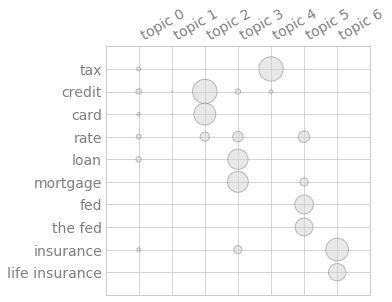

In [29]:
model = textacy.tm.TopicModel('nmf', n_topics=7)
model.fit(tfidf_matrix)
model.termite_plot(tfidf_matrix, tfidf_vectorizer.get_feature_names(), topics=-1,  n_terms=10, sort_terms_by='seriation')

## You shall know a word by the company it keeps  —  J. R. Firth

## Word2vec
Word2Vec is a group of models which helps derive relations between a word and its contextual words.
* Skip-grams 
* CBOW

<img src="./img/skipgram.png" />

https://towardsdatascience.com/word-to-vectors-natural-language-processing-b253dd0b0817

### Using Pre-trained word vectors

In [376]:
%%time 
from gensim.models.keyedvectors import KeyedVectors
if 0:
    # https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
    model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 

In [384]:
model.most_similar(positive=['dog'])

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.7803961038589478),
 ('pooch', 0.7627376914024353),
 ('cat', 0.7609456777572632),
 ('golden_retriever', 0.7500901818275452),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418622970581055),
 ('pup', 0.7406911253929138)]

In [391]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192315101624),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235946178436279),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087412595748901)]

In [387]:
model.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

### Building Word Vectors

In [408]:
%%time
from gensim.models import Word2Vec
import multiprocessing

text =[article.split() for article in articles_df.text.tolist()]
model = Word2Vec(text, size=300, window=6, min_count=2, workers=multiprocessing.cpu_count())

CPU times: user 5.24 s, sys: 89.8 ms, total: 5.33 s
Wall time: 1.62 s


In [409]:
model.most_similar(positive=['bank'])

[('report', 0.9994900226593018),
 ('business', 0.9994533061981201),
 ('card.', 0.9993137717247009),
 ('affect', 0.9993001818656921),
 ('back', 0.9992959499359131),
 ('debt', 0.999290943145752),
 ('calculate', 0.9992401599884033),
 ('bills', 0.9991890788078308),
 ('withholding', 0.9991739988327026),
 ('personal', 0.9991623759269714)]

### Document Vectors
* For short Documents (sentences or titles) use a weighted average of the word vectors
* For longer documents use Paragraph2Vec. In gensim it is implemented as Doc2Vec

In [414]:
%%time
from gensim.models.doc2vec import Doc2Vec, LabeledSentence

class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
        
    def __iter__(self):
        with open(self.filename) as readFile:
            for line in readFile:
                data = json.loads(line)
                label = data.get('label')
                words = data.get('text','').split()
                if not words: continue
                yield LabeledSentence(words=words, tags=[label])
        
def build_doc2vec_model(clean_articles, model_file):
    it = LabeledLineSentence(clean_articles)
    model = Doc2Vec(size=300, window=8, min_count=2, workers=multiprocessing.cpu_count(), alpha=0.025, min_alpha=0.025) # use fixed learning rate
    model.build_vocab(it)
    for epoch in range(10):
        model.train(it)
        model.alpha -= 0.002 # decrease the learning rate
        model.min_alpha = model.alpha # fix the learning rate, no decay
    model.save(model_file)
    
build_doc2vec_model("./topic_data.json", "./topic_doc2vec.model")    

CPU times: user 49.3 s, sys: 3.29 s, total: 52.6 s
Wall time: 18.5 s


In [416]:
%%time

model = Doc2Vec.load('./topic_doc2vec.model')
tensor_out_fn = './topic_doc2vec.tsv' 
labels_out_fn = './topic_doc2vec_labels.tsv'

with open(labels_out_fn, 'w') as labels_out, open(tensor_out_fn, 'w') as tensor_out:
    for wd in model.docvecs.doctags:
        tensor_out.write("\t".join([str(i) for i in model.docvecs[wd].tolist()]))
        tensor_out.write('\n')
        labels_out.write('%s\n' % (wd))

CPU times: user 719 ms, sys: 87.2 ms, total: 806 ms
Wall time: 827 ms


### Applications of Word Vectors

#### Finding `primary target keyword` for an article. 

Steps for finding Primary target keywords.

* For the a given article, find the most important keywords / phrases for the given article.
* Collect a list of keywords and search volumes.
* Filter the keyword list by `search volume`.
* For each `tf-idf phrase` find the combination of word-similarity and `tf-idf score`.

### Visualizations of word vectors

#### Finding Topic Gaps

* **[Topic Performance Visualizer](http://projector.tensorflow.org/?config=https://raw.githubusercontent.com/nikhilalmeida/presentations/master/socal_python_2018/nlp/data/template_projector_config.json)**

* **[Competitor Topic Difference Analysis](https://www.dropbox.com/s/4ylcr8mox70oodx/finance%20topics.png?dl=0)**


<img src="./img/topic_gaps.png" height="820" width="620" />

# References
* [Vector Similarity](https://github.com/taki0112/Vector_Similarity)
* [A Hybrid Geometric Approach for Measuring Similarity Level Among Documents and Document Clustering](https://github.com/taki0112/Vector_Similarity/blob/master/TS-SS_paper.pdf)

In [33]:
from IPython.core.display import HTML

def css():
    style = open("custom.css", "r").read()
    return HTML(style)
css()